<a href="https://colab.research.google.com/github/adityasahu88/DL_PROJECTS/blob/main/cat_vs_dog_image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Faced :**<br/>
- Intially we are unable to process all the 25k images because we are trying to load all the images from Hard-disk to RAM. Therefore we use only 6k images to process the images and create the model top of that
- To resolve the above problem we use **Image Data Generator** where we able to process all the 25k images using batch size of 64 i.e . at single point of time we can process 64 images and keras also ensure the in each epochs the image will process one time only. By using this process "Out of memory " issue get resolved.
- But the problem still remain the same .
  - Still we get the accuracy of 65% approx.
  - To process the 25k image the total no of weights and bias which was used is 34 Millions where we resize the image to ** 150 * 150 * 3 ** and suppose if we resize the image to bigger size the total no of weight and bias will cross more than 34 Millions for only Dog and Cat images.
 - Add more number of neurons and more hidden layers also will not work because it will more complex and No of param also increases.


**Solution** <br/>
 - The Main problem is the Flatten layer because we are sending the entire image (background) instead of Dog or cat.

- As we know the Deep learning help us to find the Feature Extration and we see for a single image the  total no of feature are 150 * 150 * 3 and is equal to 67500. Supose any way if we send the 600 best pixel to the model then our problem will be solved. Because the total no weight and bias will reduce and accuracy will increase.
- use other optimizers like ADAM. In SGD our learning rate is constant
- Other option is total no of images .Here we are taking 25k images and 25k images are not sufficient for train the model. To resolve the issue we may increase the no of images.
-  The **Image augmentation** is a technique that expand a training dataset by applying random transformations to images. This helps improve model generalization and reduce overfitting.
- Note: Image augmentation will not increase the number of images







In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [3]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle

In [4]:
import kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 98% 757M/775M [00:07<00:00, 168MB/s]
100% 775M/775M [00:07<00:00, 110MB/s]


In [6]:
!unzip -q dog-and-cat-classification-dataset.zip

In [29]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                      vertical_flip=True,
                                                      rotation_range=30,
                                                      height_shift_range=0.25,
                                                      width_shift_range=0.25,
                                                      validation_split=0.1,
                                                      rescale=1/255.0)



- Image Augmentation will not increase the number of images. It will randomly select the image and apply combination of horizonal flip, vertical flip,rotation range etc, either all combination or any one or two combination.
- Now our model will not only see the same images as in earlier cases say epoch 1 ,now it will see little variation in each and every epochs.

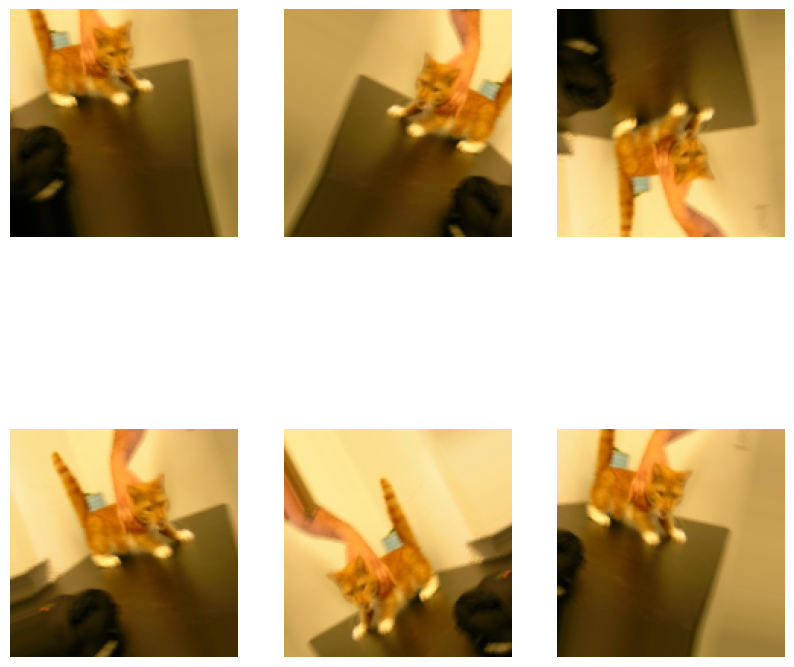

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load a single image
img_path = "PetImages/Cat/0.jpg"
img = image.load_img(img_path, target_size=(150, 150))  # Load and resize
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Generate augmented images
augmented_images = idg.flow(img_array, batch_size=1)

# Plot the first 6 augmented images
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    augmented_img = next(augmented_images)[0]  # Get the next image
    plt.imshow(augmented_img)
    plt.axis("off")

plt.show()

In [30]:
batch_size =64

In [31]:
train_idg =idg.flow_from_directory(directory="PetImages",
                                   target_size=(150,150),
                                   batch_size=batch_size,
                                   subset="training",
                                   interpolation="bilinear")

Found 22500 images belonging to 2 classes.


In [32]:
val_idg =idg.flow_from_directory(directory="PetImages",
                                   target_size=(150,150),
                                   batch_size=batch_size,
                                   subset="validation")

Found 2498 images belonging to 2 classes.


In [33]:
# Create the model
model =tf.keras.Sequential()

# Add the Input layer
model.add(tf.keras.layers.Input(shape =(150,150,3),name ='Input_Layer'))
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten(name ='Flatten_Layer'))
# Add the Hidden layer

model.add(tf.keras.layers.Dense(512,activation=tf.keras.activations.relu,name='HL1'))
model.add(tf.keras.layers.Dense(256,activation=tf.keras.activations.relu,name='HL2'))
model.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu,name='HL3'))
model.add(tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,name='HL4'))
model.add(tf.keras.layers.Dense(32,activation=tf.keras.activations.relu,name='HL5'))
model.add(tf.keras.layers.Dense(8,activation=tf.keras.activations.relu,name='HL6'))

# Add the Output layer

model.add(tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax,name='Output_Layer'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Flatten_Layer (Flatten)              │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL1 (Dense)                          │ (None, 512)                 │      34,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL2 (Dense)                          │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL3 (Dense)                          │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL4 (Dense)                          │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL5 (Dense)                          │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL6 (Dense)                          │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,735,354 (132.50 MB)

 Trainable params: 34,735,354 (132.50 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics =['accuracy'])

In [35]:
model.fit(train_idg,epochs=10,validation_data=val_idg,batch_size=batch_size)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.5205 - loss: 0.6929 - val_accuracy: 0.5404 - val_loss: 0.6895
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.5572 - loss: 0.6853 - val_accuracy: 0.5805 - val_loss: 0.6819
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 394s 950ms/step - accuracy: 0.5735 - loss: 0.6801 - val_accuracy: 0.5857 - val_loss: 0.6774
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 338s 959ms/step - accuracy: 0.5694 - loss: 0.6794 - val_accuracy: 0.5689 - val_loss: 0.6795
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 342s 971ms/step - accuracy: 0.5764 - loss: 0.6763 - val_accuracy: 0.5737 - val_loss: 0.6709
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 348s 986ms/step - accuracy: 0.5763 - loss: 0.6748 - val_accuracy: 0.6009 - val_loss: 0.6688
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 334s 949ms/step - accuracy: 0.5800 - loss: 0.6738 - val_accuracy: 0.5873 - val_loss: 0.6719
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.5761 - loss: 0.

In [36]:
model.history.history

{'accuracy': [0.5312888622283936,
  0.5569777488708496,
  0.5709778070449829,
  0.5688889026641846,
  0.574222207069397,
  0.576711118221283,
  0.5801777839660645,
  0.579022228717804,
  0.5851555466651917,
  0.5832444429397583],
 'loss': [0.6913159489631653,
  0.6846244931221008,
  0.6803914904594421,
  0.6798117756843567,
  0.6765902638435364,
  0.6738928556442261,
  0.6727644801139832,
  0.6715238094329834,
  0.670001208782196,
  0.6700007915496826],
 'val_accuracy': [0.540432333946228,
  0.5804643630981445,
  0.5856685638427734,
  0.5688551068305969,
  0.5736589431762695,
  0.6008806824684143,
  0.5872698426246643,
  0.5792633891105652,
  0.5812650322914124,
  0.5544435381889343],
 'val_loss': [0.6894687414169312,
  0.6819446086883545,
  0.677395224571228,
  0.6795322299003601,
  0.6709197163581848,
  0.6688146591186523,
  0.6718825101852417,
  0.6763454079627991,
  0.6683993935585022,
  0.6759533286094666]}

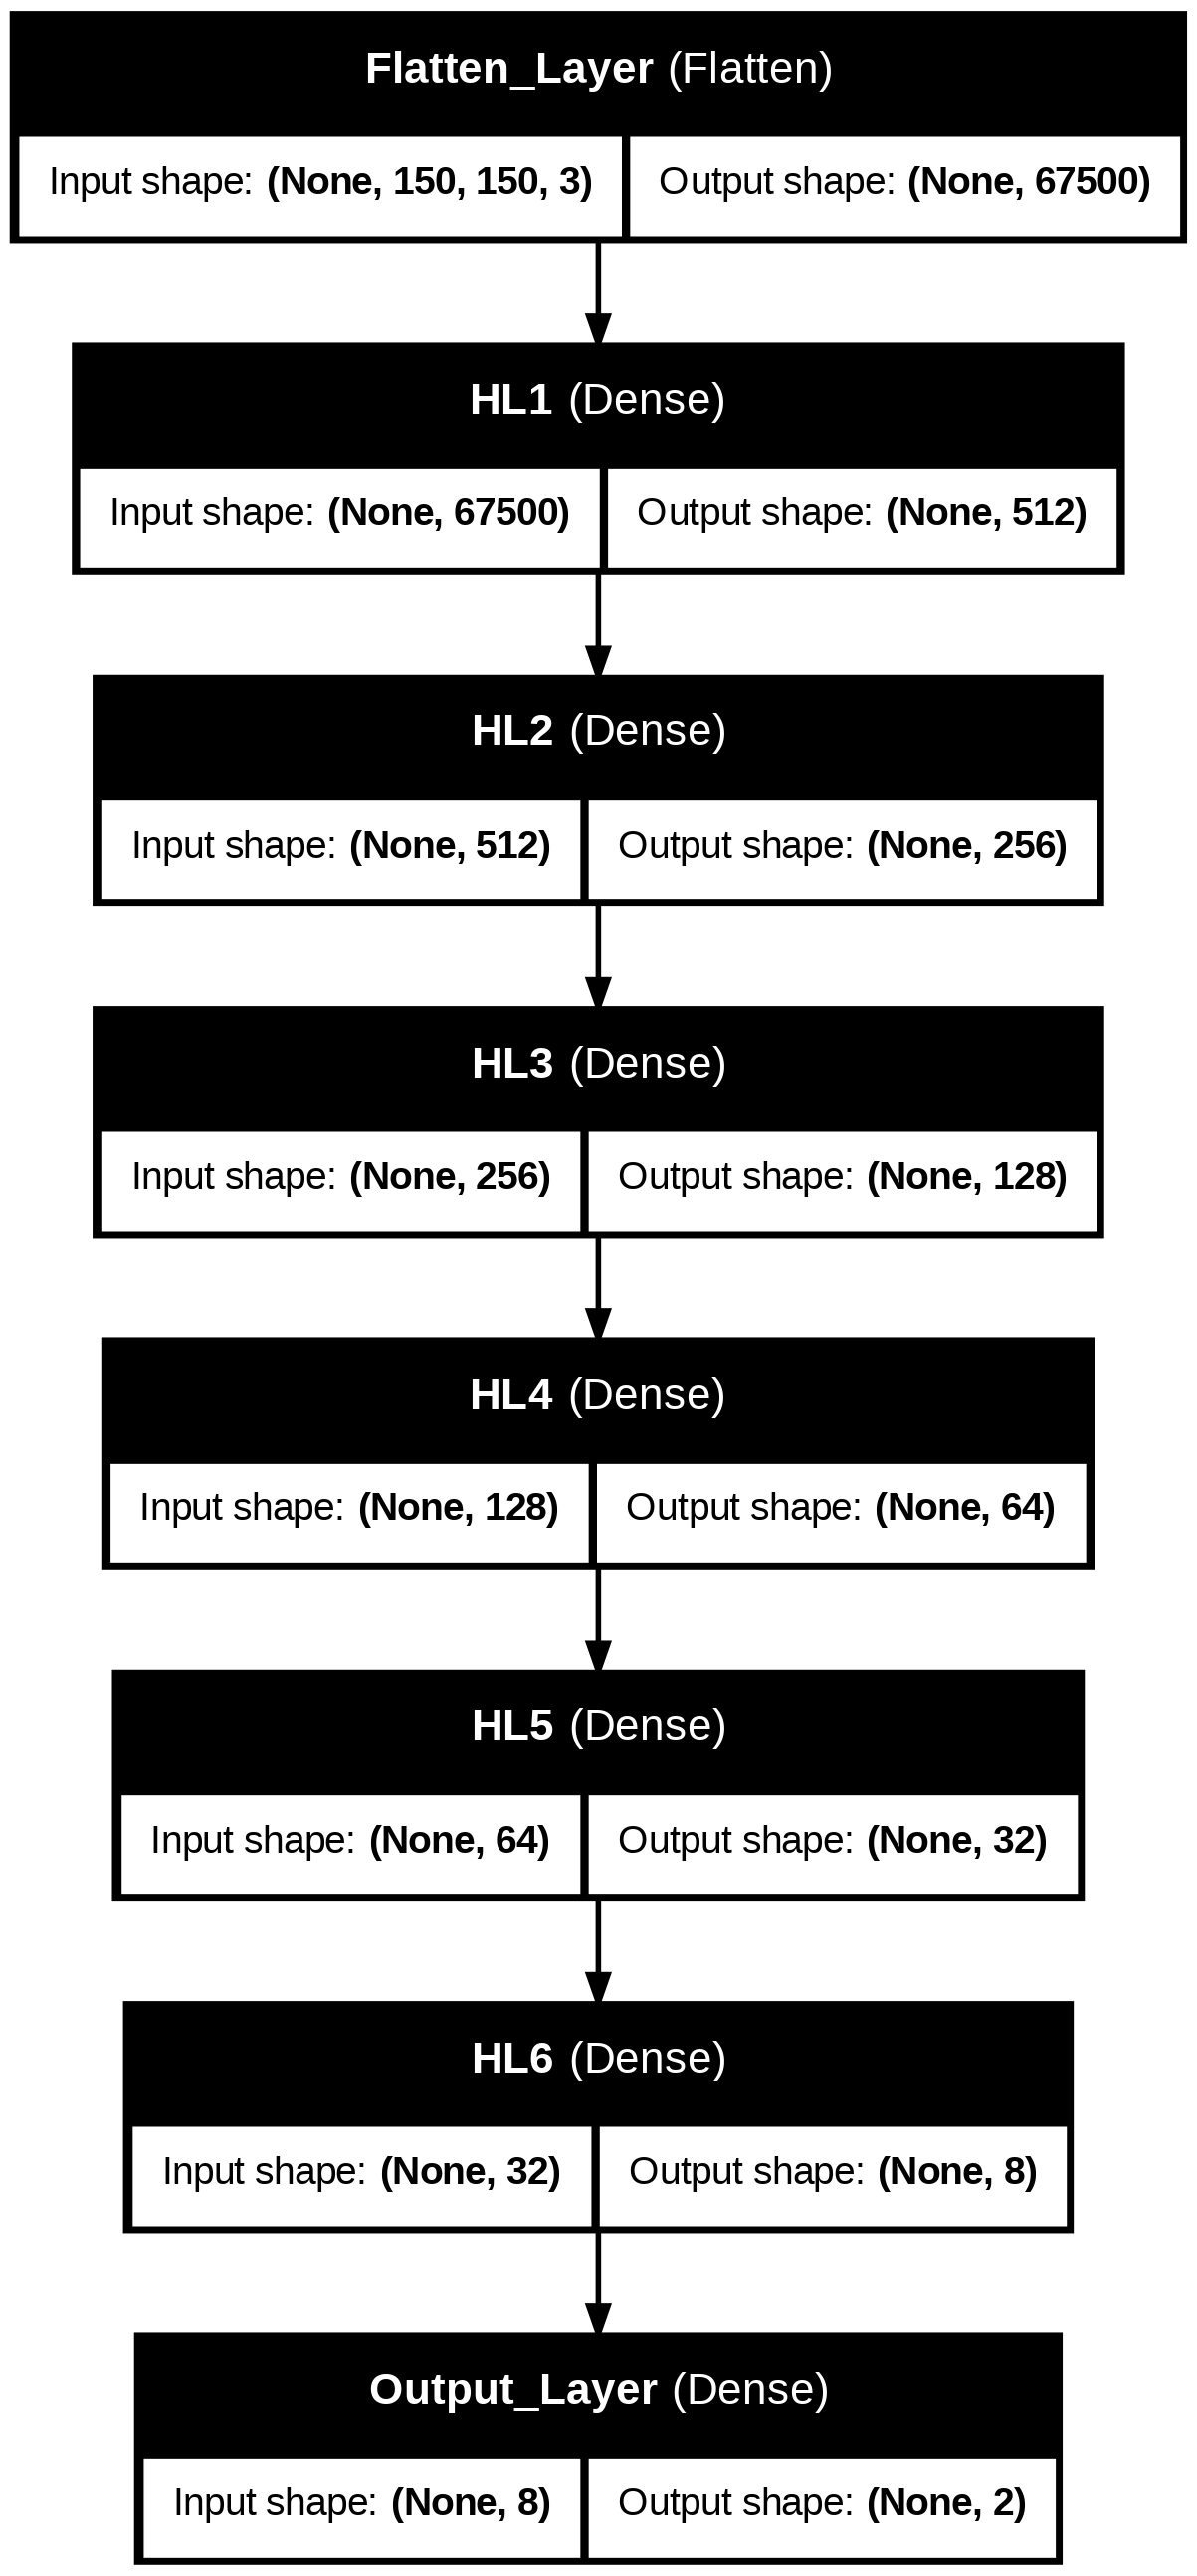

In [40]:
# plot the model
tf.keras.utils.plot_model(model,show_layer_names=True,show_shapes=True)

In [41]:
train_idg.class_indices

{'Cat': 0, 'Dog': 1}

In [47]:
img = cv2.imread("dog_image.jpg")
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(150,150))
img = img/255.0

model.predict(img.reshape(1,150,150,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[0.48541594, 0.51458406]], dtype=float32)

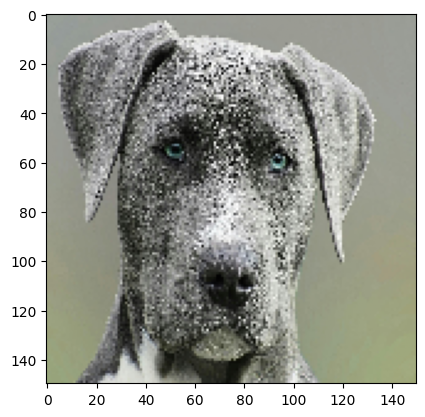

In [48]:
plt.imshow(img)